# Binary Classification : Tabular Dataset

> 1st level. Titanic: Machine Learning from Disaster

<br></br>

# 타이타닉 튜토리얼 1
# - Exploratory data analysis, visualization, machine learning

- https://kaggle-kr.tistory.com/17?category=868316

- https://www.kaggle.com/c/titanic

<br></br>

─▶ 앞으로 우리가 해야할 프로세스는 대략 아래와 같습니다.

1. 데이터셋 확인

	대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.

2. 탐색적 데이터 분석(exploratory data analysis)

	여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.

3. feature engineering

	모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다.</br>
	one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.

4. model 만들기 - sklearn 을 사용해 모델을 만듭니다. 

	파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. </br>
	물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 도 있습니다.

5. 모델 학습 및 예측

	trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction 합니다.

6. 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 

	풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.<br></br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # ignore warnings

%matplotlib inline

## 1️⃣ Dataset 확인

#### ◾ feature/label

- 우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare 이며, 예측하려는 target label 은 Survived 입니다.

| 변수(feature, variable) |	정의 | 설명 | 타입 |
|-------------------------|-----|------|-----|
| survival | 생존여부 | target label 임. 1, 0 으로 표현됨 | integer |
| Pclass | 티켓의 클래스 | 1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature | integer |
| sex | 성별 | male, female 로 구분되며 binary | string |
| Age |	나이 | continuous | integer |
| sibSp | 함께 탑승한 형제와 배우자의 수 | quantitative | integer |
| parch | 함께 탑승한 부모, 아이의 수 | quantitative | integer |
| ticket | 티켓 번호 | alphabat + integer | string |
| fare | 탑승료 | continuous | float |
| cabin | 객실 번호 | alphabat + integer | string |
| embared | 탑승 항구 | C = Cherbourg, Q = Queenstown, S = Southampton | string |

In [2]:
df_train = pd.read_csv('./dataset/titanic/train.csv')
df_test = pd.read_csv('./dataset/titanic/test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2️⃣ Null Data Check

- Null 데이터가 존재하는 열을 좀 더 보기 편하도록 그래프로 시각화해서 살펴본다.

In [3]:
df_train['Age'].shape, df_train['Age'].shape[0]

((891,), 891)

In [4]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
		col, (df_train[col].isnull().sum()/df_train[col].shape[0]) * 100
	)
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [5]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
		col, (df_test[col].isnull().sum()/df_test[col].shape[0]) * 100
	)
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


└▶ Train, Test set 에서 Age(둘다 약 20%), Cabin(둘다 약 80%), Embarked(Train만 0.22%) null data 존재하는 것을 볼 수 있습니다.

#### ◾ MANO Library

- MANO 라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있다.

- missingno는 "missing number(누락된 번호)"의 줄임말

- missingno는 데이터 시각화를 위한 Python 라이브러리 중 하나입니다. </br>
	이 라이브러리는 주로 데이터셋에서 누락된 값 또는 결측치를 시각화하여 쉽게 파악할 수 있도록 도와줍니다.

- 주요 기능은 다음과 같습니다:

	1. 결측치 시각화: missingno는 데이터셋의 결측치를 시각적으로 표현합니다. 

	 빈 값이나 결측치를 채우기 전에 데이터의 양상을 빠르게 이해할 수 있도록 도와줍니다.

	2. 히트맵: missingno는 히트맵을 통해 데이터셋의 누락된 값을 시각화합니다.
	
	 이를 통해 데이터의 패턴과 결측치의 위치를 쉽게 파악할 수 있습니다.

	3. 바 차트: 결측치가 있는 열의 데이터 비율을 바 차트로 나타냅니다.
	
	 이를 통해 어떤 열에 결측치가 많은지를 시각적으로 파악할 수 있습니다.

- missingno는 데이터 전처리 및 시각화 과정에서 유용하게 사용될 수 있으며, 데이터셋의 품질을 빠르게 평가하는 데 도움이 됩니다.

In [10]:
# !pip install missingno

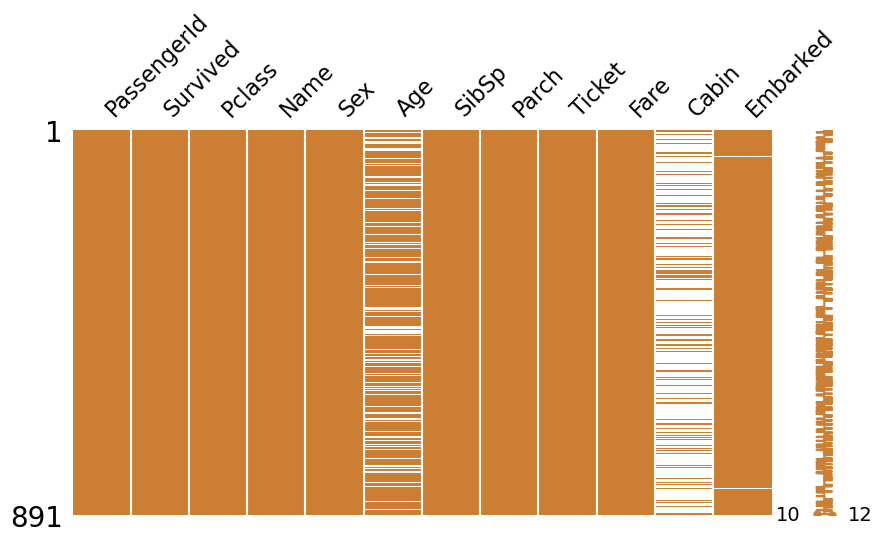

In [6]:
import missingno as msno

msno.matrix(df=df_train.iloc[:, :], figsize=(10,5), color=(0.8, 0.5, 0.2));

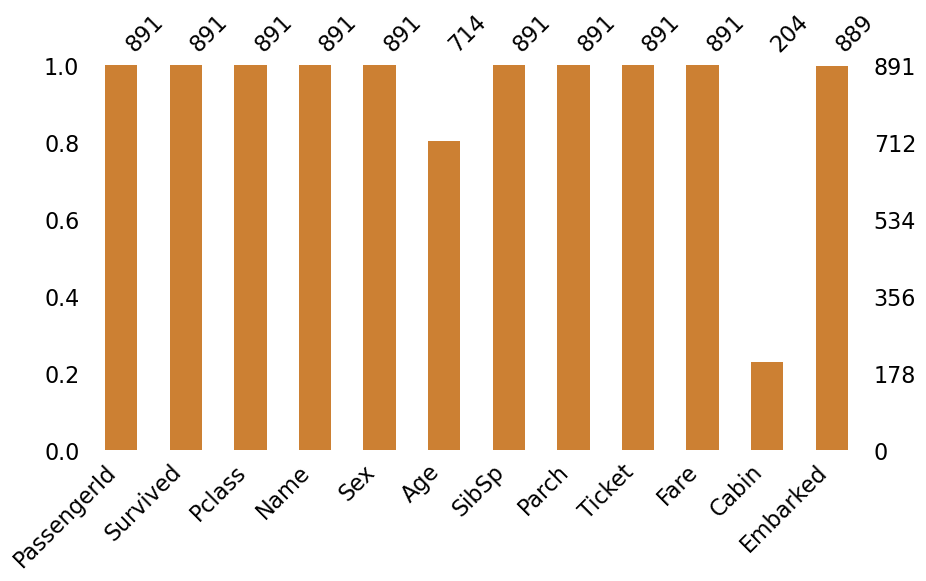

In [7]:
msno.bar(df=df_train.iloc[:, :], figsize=(10,5), color=(0.8, 0.5, 0.2));

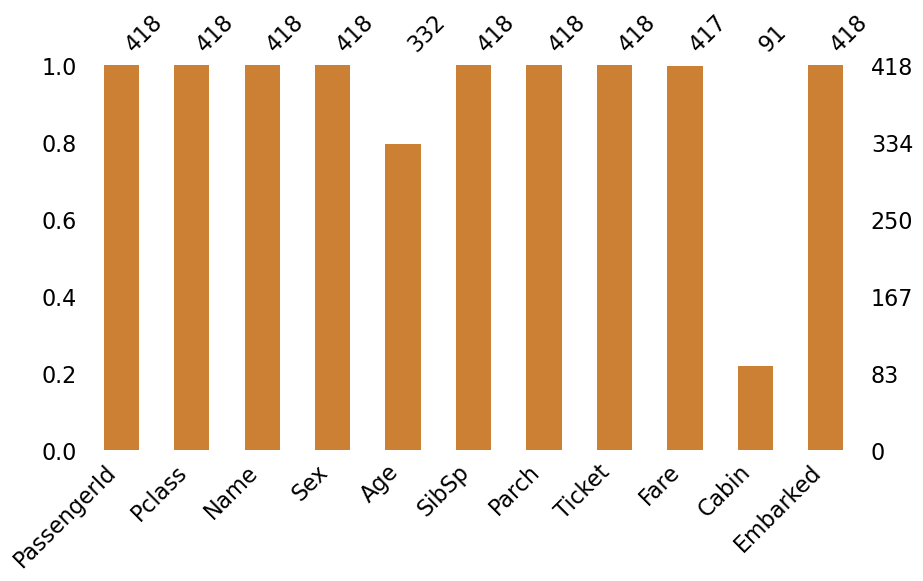

In [8]:
msno.bar(df=df_test.iloc[:, :], figsize=(10,5), color=(0.8, 0.5, 0.2));

## 3️⃣ Target Label 확인

- target label 이 어떤 distribution 을 가지고 있는 지 확인해봐야 합니다.

- 지금 같은 binary classification 문제의 경우에는 1과 0의 분포가 어떠하냐에 따라 모델의 평가 방법이 달라질 수 있습니다.

#### ◾ pie & count plot

In [12]:
plt.style.use('seaborn')
sns.set_theme(font_scale=1.5)
# 이 두줄은 matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 
# 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.

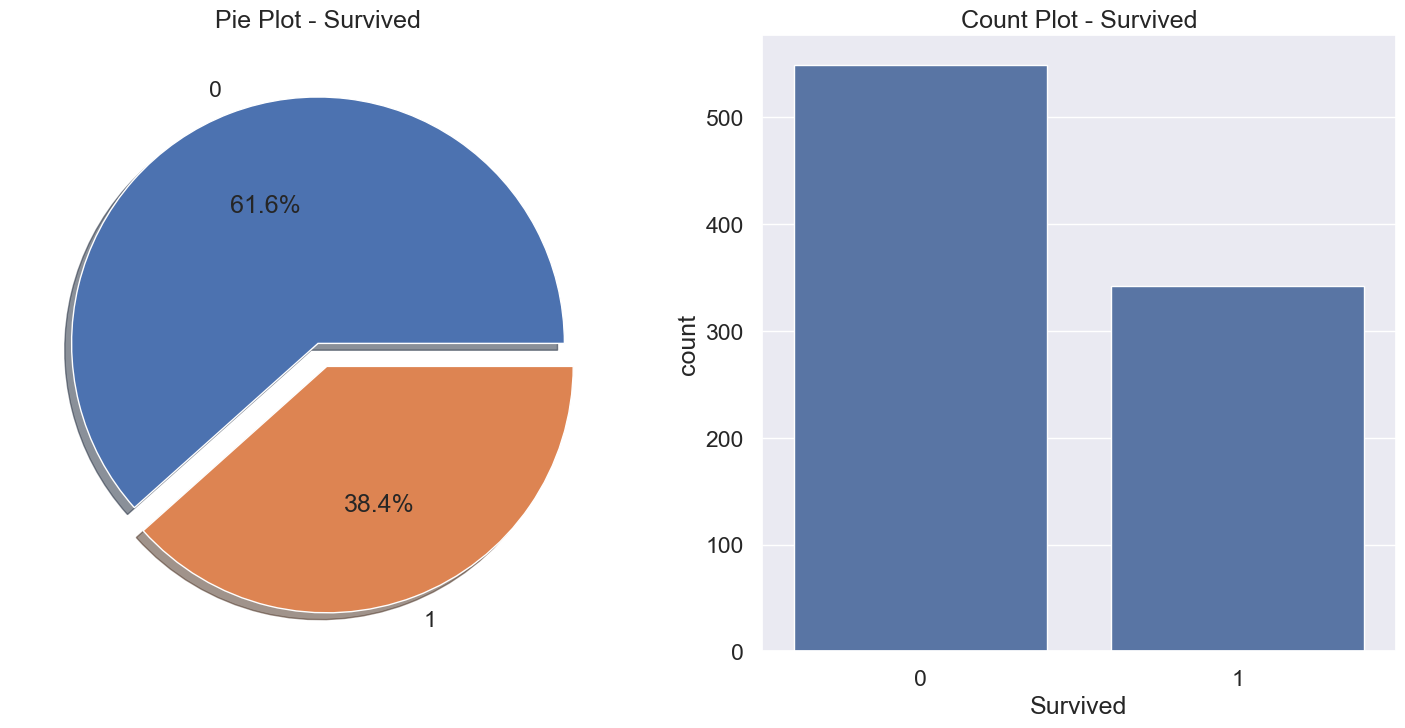

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Pie Plot - Survived")
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title("Count Plot - Survived")

plt.subplots_adjust(hspace=0.5)#, wspace=0.5)
plt.show()

└▶ 38.4 % 가 살아남았다.

- target label 의 분포가 제법 균일(balanced)합니다.

- 불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우에는 만약 모델이 모든 것을 1이라 해도 정확도가 99%가 나오게 됩니다.

	0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됩니다. 지금 문제에서는 그렇지 않으니 계속 진행하겠습니다.<br></br>


## 4️⃣ EDA, Exploratory Data Analysis

#### ◾ 1. Pclass

- Pclass 는 ordinal(서수형) 데이터로 카테고리이면서 순서가 있는 데이터 타입입니다.

- 먼저 Pclass 에 따른 생존률의 차이를 살펴보겠습니다. <br></br>

- 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe 에서는 __groupby__ 를 사용하면 쉽게 할 수 있습니다. 
	
	또한 pivot 이라는 메소드도 있습니다.

	- 'Pclass', 'Survived' 를 가져온 후, pclass 로 묶습니다. 

	- 그러고 나면 각 pclass 마다 0, 1 이 count가 되는데, 이를 평균내면 각 pclass 별 생존률이 나옵니다.

	- 아래와 같이 count() 를 하면, 각 class 에 몇명이 있는 지 확인할 수 있으며, 
	
	- sum() 을 하면, 216 명중 생존한(survived=1)사람의 총합을 주게 됩니다.<br></br>

- pandas의 __crosstab__ 을 사용하면 좀 더 위 과정을 좀 더 수월하게 볼 수 있습니다.

In [14]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count() #--> 전체 수

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum() #--> 생존자 수

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


└▶ grouped 객체에 mean() 을 하게 되면, 각 클래스별 생존률을 얻을 수 있습니다.

- class 1 이면 아래와 같습니다.

	$~~~\cfrac{80}{~(80+136)~}\approx 0.63$

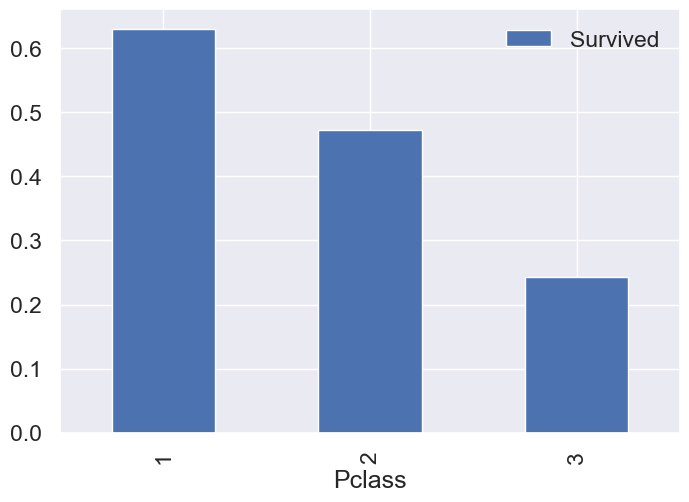

In [18]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar();

└▶ Pclass 가 좋을 수록(1st) 생존률이 높은 것을 확인할 수 있습니다.

- 좀 더 보기 쉽게 그래프를 그려보겠습니다.

- seaborn 의 __countplot__ 을 이용하면, 특정 label 에 따른 개수를 확인해볼 수 있습니다.

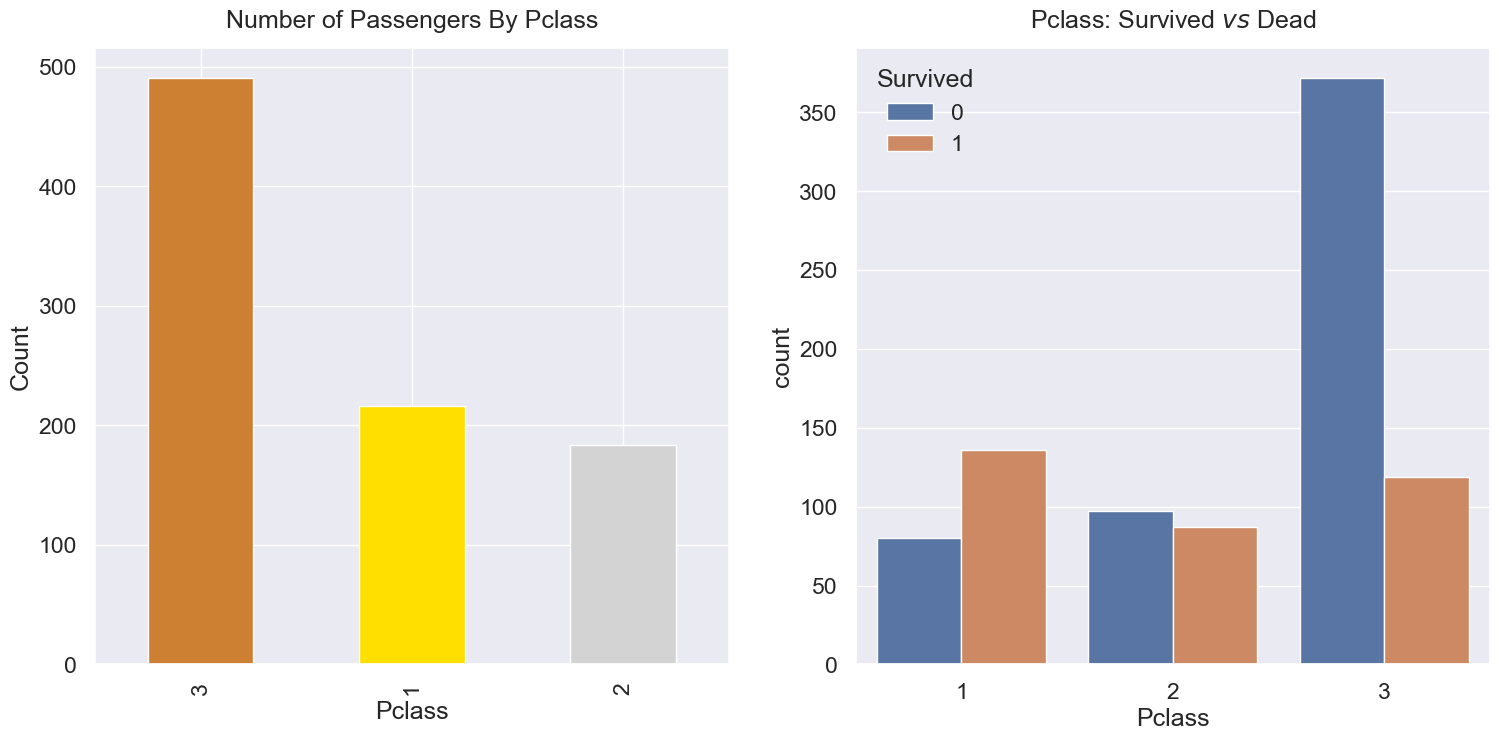

In [19]:
y_position = 1.02

f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title("Number of Passengers By Pclass", y=y_position)
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived $vs$ Dead', y=y_position)

plt.show()

👉 figure out

- 클래스가 높을 수록, 생존 확률이 높은걸 확인할 수 있습니다. Pclass 1, 2, 3 순서대로 63%, 48%, 25% 입니다.

- 우리는 생존에 Pclass 가 큰 영향을 미친다고 생각해볼 수 있으며, 나중에 모델을 세울 때 이 feature 를 사용하는 것이 좋을 것이라 판단할 수 있습니다.<br></br>

#### ◾ 2. Sex

- 이번에는 성별로 생존률이 어떻게 달라지는 지 확인해보겠습니다.

- 마찬가지로 pandas __groupby__ 와 seaborn __countplot__ 을 사용해서 시각화해봅시다.

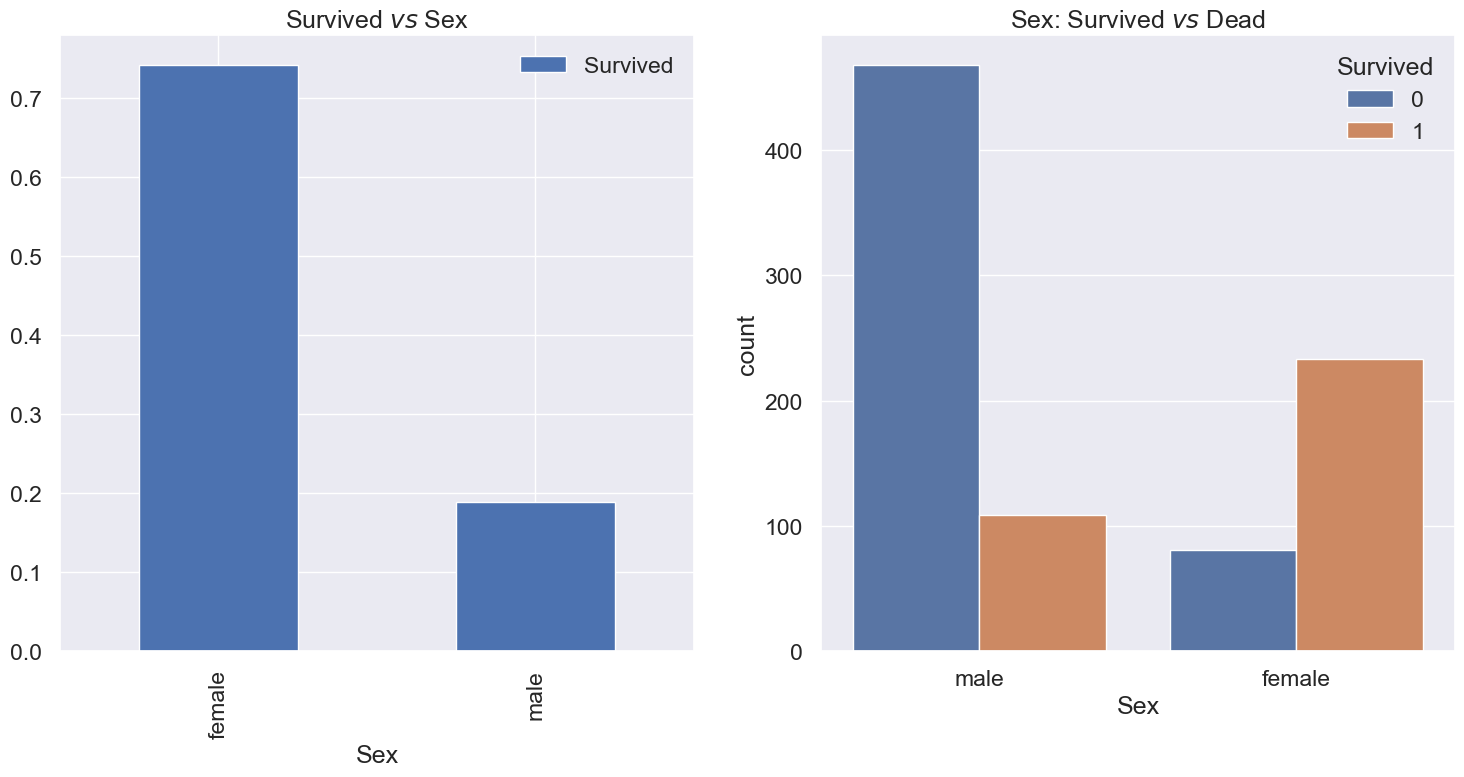

In [21]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived $vs$ Sex')

sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived $vs$ Dead')

plt.show()

In [22]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [23]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


👉 figure out

- 여자가 생존할 확률이 높다.

- Pclass 와 마찬가지로, Sex 도 예측 모델에 쓰일 중요한 feature 임을 알 수 있습니다.

#### ◾ 3. Both Sex & Pclass

- 이번에는 Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는 지 확인해 봅시다.

- seaborn 의 ~~factorplot~~ 을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있습니다.

- factorplot을 대체하는 함수 --> seaborn.__catplot()__

	- kind= 매개변수를 사용하여 플롯의 종류를 지정할 수 있다. --> 'point', 'bar', 'strip', 'box', 'violin' 등

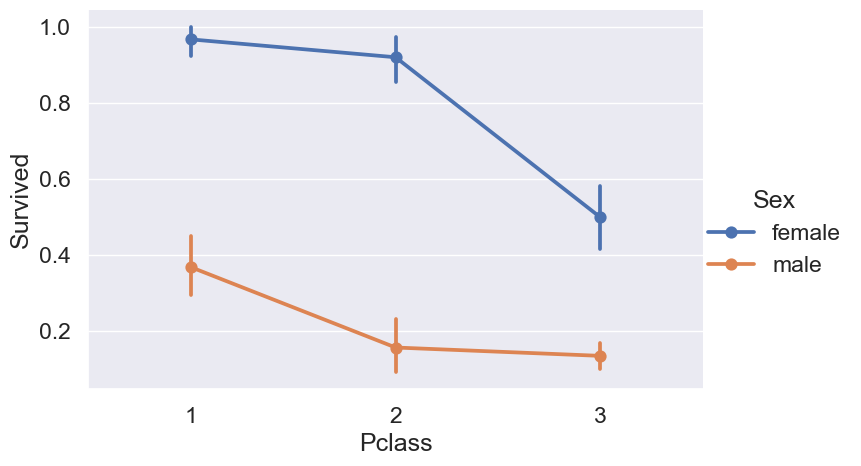

In [31]:
# sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5) --> Depretcated

sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='point', aspect=1.5);

└▶ 모든 클래스에서 female 이 살 확률이 male 보다 높은 걸 알 수 있습니다.

- 또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률 높습니다.

- 위 그래프는 hue 대신 column 으로 하면 아래와 같아집니다

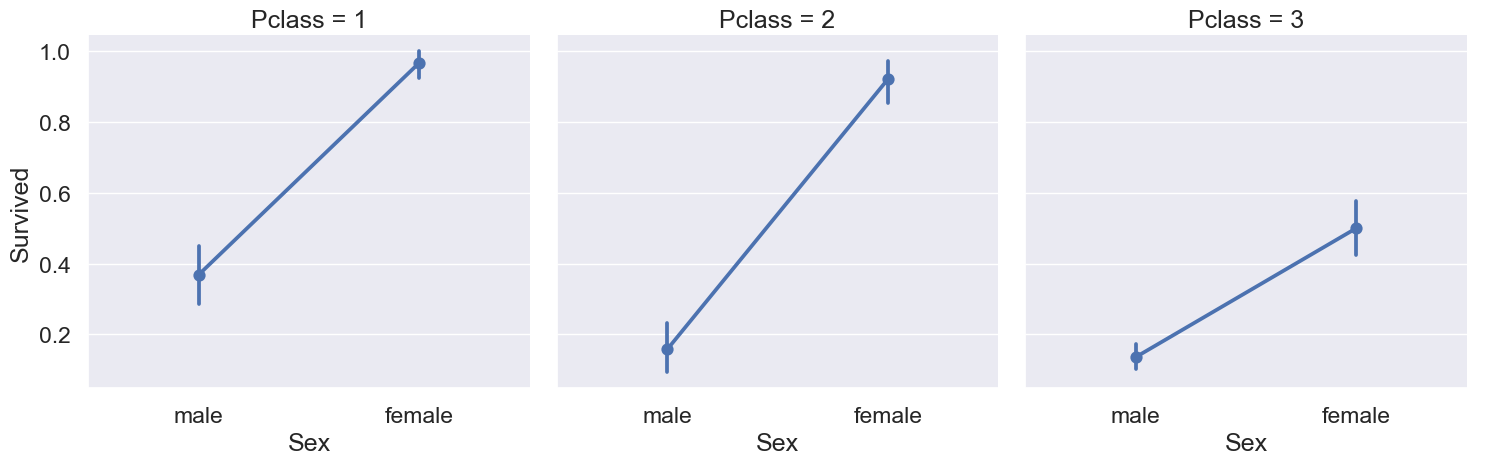

In [36]:
sns.catplot(x='Sex', y='Survived', col='Pclass', data=df_train, kind='point', aspect=1);

#### ◾ 4. Age

In [37]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


─▶ 생존에 따른 Age의 histogram 을 그려보겠습니다.

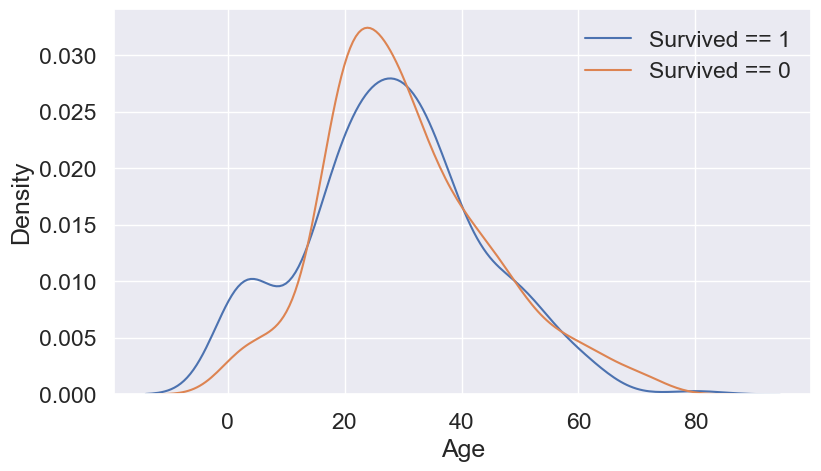

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))

sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

└▶ 생존자 중 나이가 어린 경우가 많음을 볼 수 있습니다.

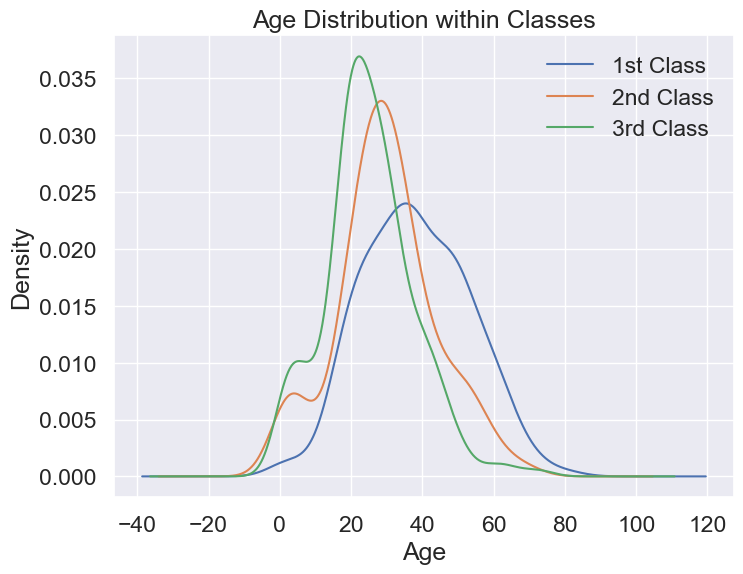

In [40]:
plt.figure(figsize=(8,6))

df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within Classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

└▶ Class가 높을 수록 나이 많은 사람의 비중이 커짐.

- 나이대가 변하면서 생존률이 어떻게 되는 지 보려고 합니다.

- 나이 범위를 점점 넓혀가며, 생존률이 어떻게 되는지 한번 봅시다.

Text(0.5, 0, 'Range of Age(0~x)')

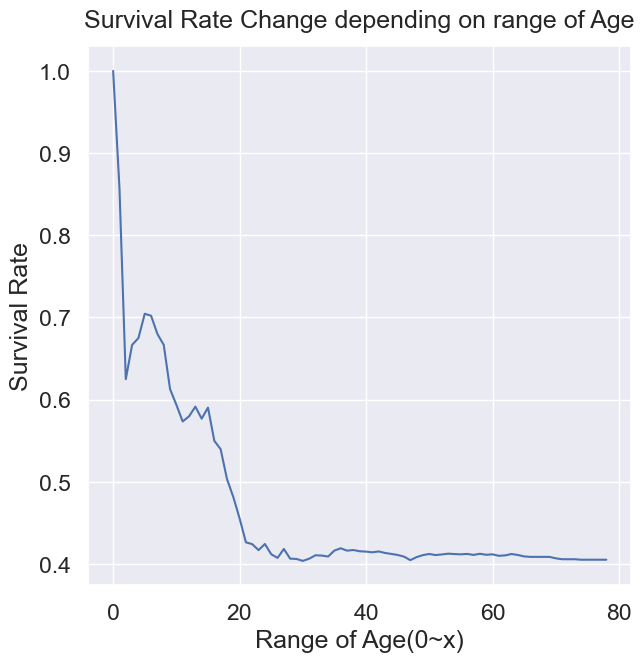

In [41]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(
		df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived'])
	)

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival Rate Change depending on range of Age', y=1.02)
plt.ylabel('Survival Rate')
plt.xlabel('Range of Age(0~x)')

👉 figure out

- 나이가 어릴 수록 생존률이 확실히 높은것을 확인할 수 있습니다.

- 우리는 이 나이가 중요한 feature 로 쓰일 수 있음을 확인했습니다.

#### ◾ 4. Pclass, Sex, Age

- 지금까지 본, Sex, Pclass, Age, Survived 모두에 대해서 보고싶습니다.

- 이를 쉽게 그려주는 것이 seaborn 의 __violinplot__ 입니다.

- x 축은 우리가 나눠서 보고싶어하는 case(여기선 Pclass, Sex) 를 나타내고,

- y 축은 보고 싶어하는 distribution(Age) 입니다.

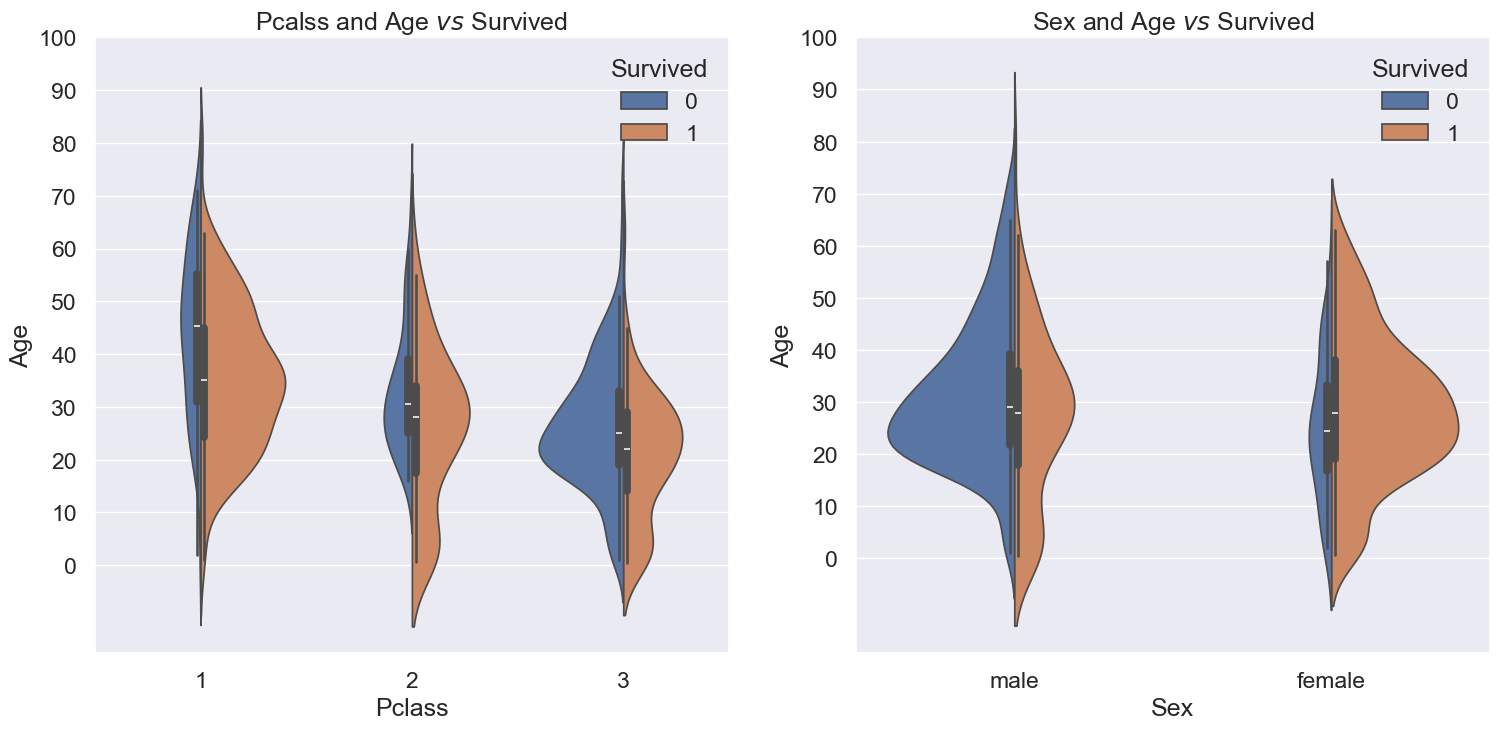

In [42]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pcalss and Age $vs$ Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age $vs$ Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

👉 figure out

- 왼쪽 그림은 Pclass 별로 Age의 distribution 이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프입니다.

- 오른쪽 그림도 마찬가지 Sex, 생존에 따른 distribution 이 어떻게 다른지 보여주는 그래프입니다.

- 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있습니다.

- 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한것을 볼 수 있습니다.

- 여성과 아이를 먼저 챙긴 것을 볼 수 있습니다.

#### ◾ 6. Embarked

- Embarked 는 탑승한 항구를 나타냅니다.

- 위에서 해왔던 것과 비슷하게 탑승한 곳에 따르 생존률을 보겠습니다.

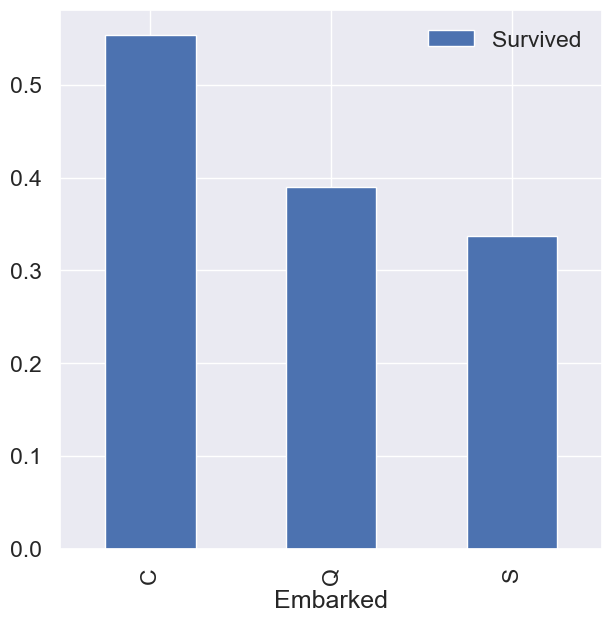

In [44]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))

df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax);

└▶ 조금의 차이는 있지만 생존률은 좀 비슷한 거 같습니다.

- 그래도 C가 제일 높군요.

- 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 그래도 사용하겠습니다.

- 사실, 모델을 만들고 나면 우리가 사용한 feature 들이 얼마나 중요한 역할을 했는지 확인해볼 수 있습니다. </br>
	이는 추후에 모델을 만들고 난 다음에 살펴볼 것입니다.

- 다른 feature 로 split 하여 한번 살펴보겠습니다

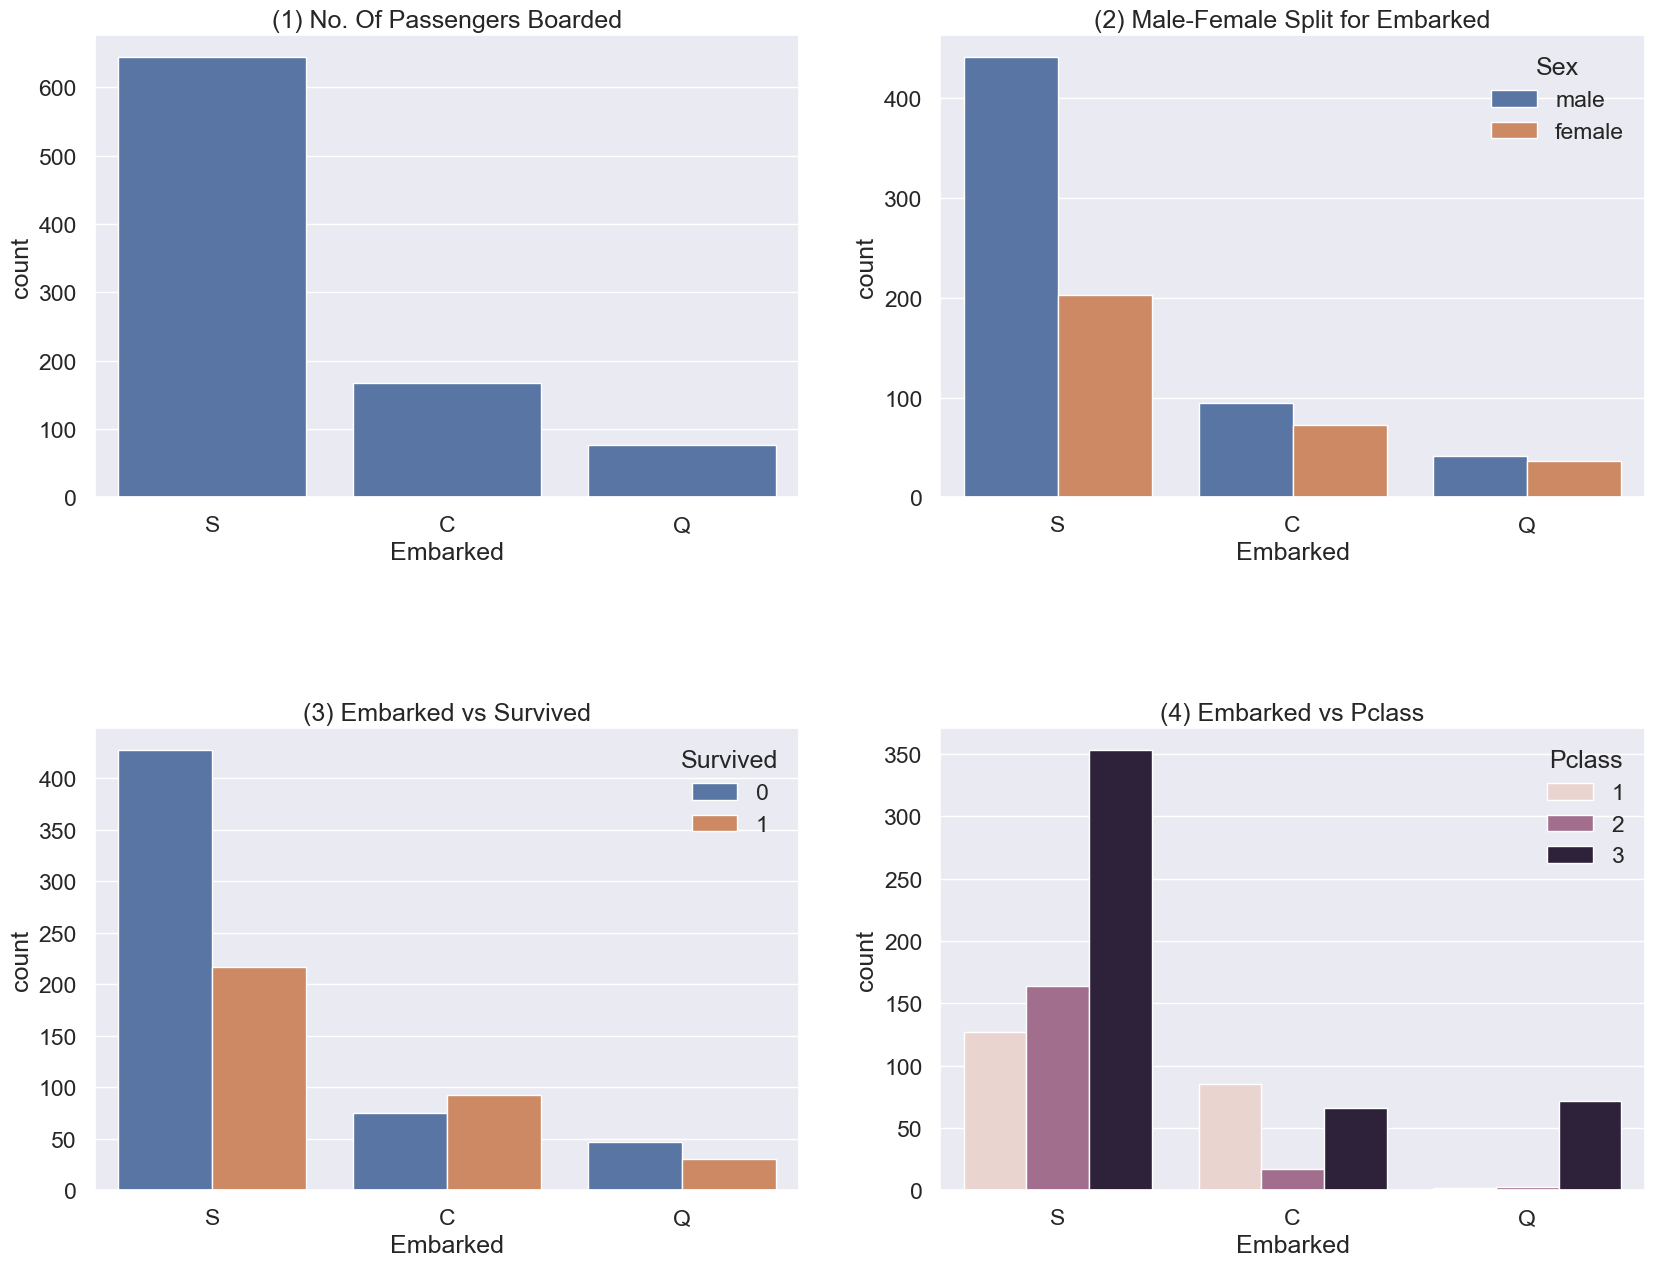

In [46]:
f, ax=plt.subplots(2, 2, figsize=(20,15))

sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

👉 figure out

- Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승했습니다.

- Figure(2) - C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.

- Figure(3) - 생존확률이 S 경우 많이 낮은 걸 볼 수 있습니다. (이전 그래프에서 봤었습니다)

- Figure(4) - Class 로 split 해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇습니다. S는 3rd class 가 많아서 생존확률이 낮게 나옵니다.

#### ◾ 7. Family - SibSp(형제,자매) + Parch(부모,자녀)

- SibSp와 Parch를 합하면 Family 가 될 것이다. Family 로 합쳐서 분석해 볼 수 있다.

- FamilySize 와 생존의 관계를 한번 살펴봅시다.

In [47]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


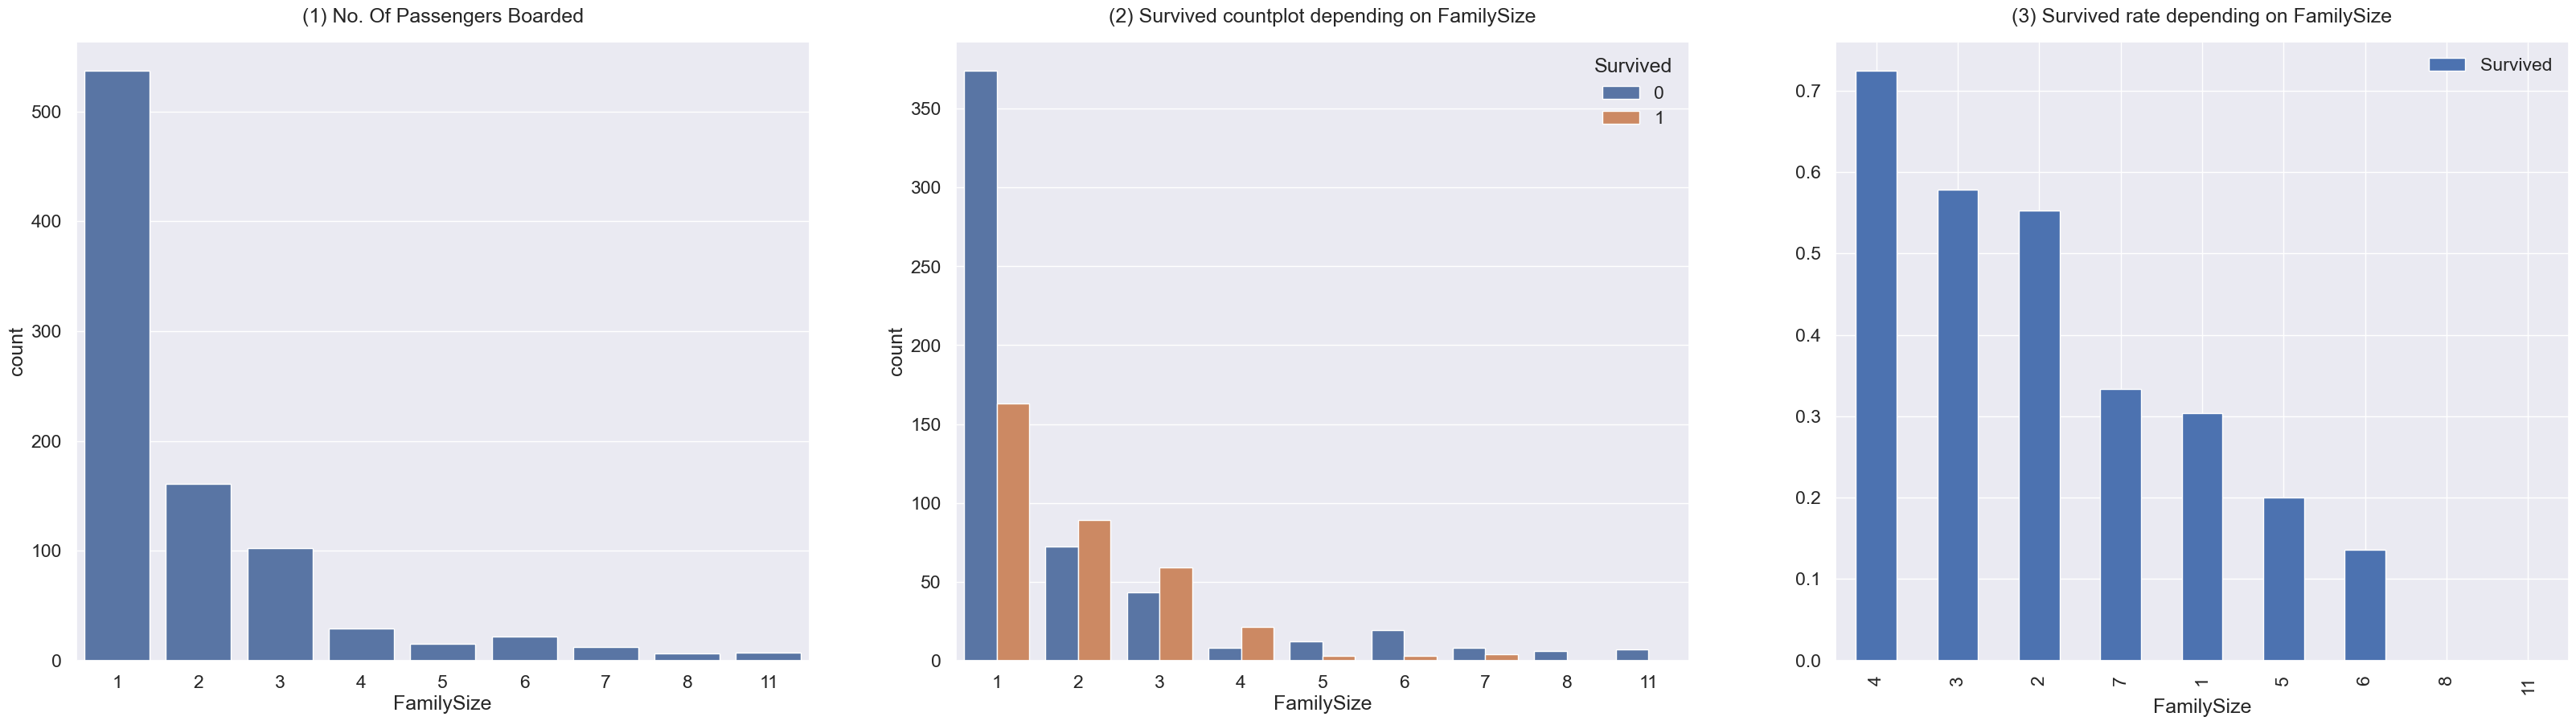

In [50]:
f, ax = plt.subplots(1, 3, figsize=(40,10))

sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

👉 figure out

- Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있습니다. 대부분 1명이고 그 다음으로 2, 3, 4명입니다.

- Figure (2), (3) - 가족 크기에 따른 생존비교입니다.

	- 가족이 4명인 경우가 가장 생존확률이 높습니다.
	- 가족수가 많아질수록(5, 6, 7, 8, 11), 생존확률이 낮아지네요.
	- 가족수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작네요.
	- 3~4명 선에서 생존확률이 높은 걸 확인할 수 있습니다.

#### ◾ 8. Fare

- Fare 는 탑승요금이며, contious feature 입니다. histogram 을 한번 그려보겠습니다.

<Figure size 800x800 with 0 Axes>

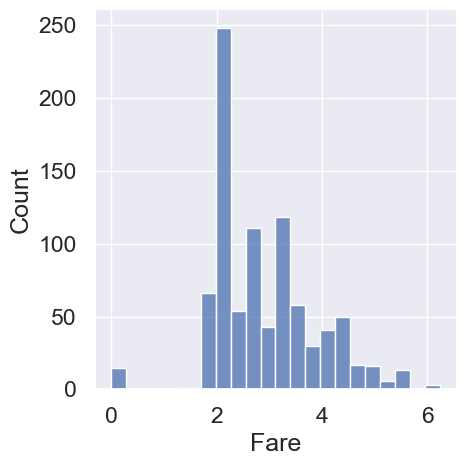

In [60]:
#f, ax = plt.subplots(1, 1, figsize=(8,8))

plt.figure(figsize=(8,8))
g = sns.displot(x=df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()))#, ax=ax)
#g.legend(loc='best')

└▶ distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness).

<img src="https://github.com/ElaYJ/Study_EDA/assets/153154981/a40beb8e-5ade-41a7-8945-511e345b6bea" width="%" height="%"></br>

- 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다.

- 몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.

- outlier의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다.

- 여기서 우리는 pandas 의 유용한 기능을 사용할 겁니다.

	- dataFrame 의 특정 columns 에 공통된 작업(함수)를 적용하고 싶으면 아래의 map, 또는 apply 를 사용하면 매우 손쉽게 적용할 수 있습니다.
	- 우리가 지금 원하는 것은 Fare columns 의 데이터 모두를 log 값 취하는 것인데,
	- 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map 에 인수로 넣어주면, 
	- Fare columns 데이터에 그대로 적용이 됩니다. 매우 유용한 기능이니 꼭 숙지하세요!


In [57]:
# 아래 줄은 뒤늦게 발견하였습니다. 13번째 강의에 언급되니, 일단 따라치시고 넘어가면 됩니다.

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# g = sns.displot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
# g = g.legend(loc='best')

└▶ log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.

<img src="https://github.com/ElaYJ/Study_EDA/assets/153154981/70d6039c-8902-410a-9a42-71b75d70195d" width="%" height="%">

- 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.

- 사실 방금한 것은 feature engineering 에 들어가는 부분인데, 여기서 작업했습니다.

- 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나, </br>
	새로운 feature를 추가하는 것을 feature engineering 이라고 하는데, 우리는 이제 그것을 살펴볼 것입니다.

#### ◾ 9. Cabin

- 이 feature 는 NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않습니다.

- 그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠습니다.

#### ◾ 10. Ticket

- 이 feature 는 NaN 은 없습니다.

- 일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요합니다.

In [61]:
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

└▶ ticket number 는 매우 다양합니다.

- 우리는 여기서 어떤 특징을 이끌어내서 생존과 연결시킬 수 있을까요?

- 여러분이 직접 한번 아이디어를 내보세요! 이것이 본격적인 캐글 레이스의 시작점입니다.</br>
	이 튜토리얼에서는 튜토리얼이니 일단 ticket 은 넘기도록 하겠습니다. </br>
	튜토리얼을 끝낸 후, 여러분의 모델의 성능을 향상시키기 위해 ticket 에서 정보를 이끌어내는 것도 좋겠네요!


본 튜토리얼은

- https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python

- https://www.kaggle.com/startupsci/titanic-data-science-solutions

- https://www.kaggle.com/ash316/eda-to-prediction-dietanic

- https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling 을 참고하여 만들었습니다.